# Emotion Classification using Kaggle Emotions Dataset

This notebook demonstrates the process of developing a machine learning model to classify emotions in Twitter messages using the Kaggle emotions dataset. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

## Steps:
1. Data Ingestion
2. Data Preprocessing
3. Feature Extraction
4. Model Training
5. Model Evaluation
6. Model Testing
7. Model Deployment

In [2]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melawadly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melawadly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Data Ingestion

Load the dataset from a CSV file into a pandas DataFrame.

In [3]:
# Data Ingestion
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load Data
data = load_data('text.csv')
print("Data Loaded:")
print(data.head())

Data Loaded:
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


## 2. Data Preprocessing

Clean the text, remove stopwords, and lemmatize the text.

In [4]:
# Data Preprocessing
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.strip()
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def preprocess_data(data):
    data['text'] = data['text'].apply(preprocess_text)
    data['text'] = data['text'].apply(remove_stopwords)
    data['text'] = data['text'].apply(lemmatize_text)
    return data

# Preprocess Data
data = preprocess_data(data)
print("Data Preprocessed:")
print(data.head())

Data Preprocessed:
                                                text  label
0                 feel really helpless heavy hearted      4
1  ive enjoyed able slouch relax unwind frankly n...      0
2            gave internship dmrg feeling distraught      4
3                                dont know feel lost      0
4  kindergarten teacher thoroughly weary job take...      4


## 3. Feature Extraction

Convert the text data into numerical features using TF-IDF vectorisation.

In [5]:
# Feature Extraction
def extract_features(data):
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['text']).toarray()
    y = data['label']
    return X, y

# Extract Features
X, y = extract_features(data)
print("Features Extracted:")
print(X.shape, y.shape)

Features Extracted:
(416809, 5000) (416809,)


## 4. Model Training

Split the data into training and validation sets, train a logistic regression model, and print the classification report.

In [6]:
# Model Training
def train_model(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))
    return model, X_val, y_val

# Train Model
model, X_val, y_val = train_model(X, y)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.77      0.79      6929
           3       0.91      0.90      0.91     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



## 5. Model Evaluation

Evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix. Visualise the confusion matrix.

Accuracy: 0.8999424198075862
Precision: 0.8989726789817695
Recall: 0.8999424198075862
F1 Score: 0.899338945159687


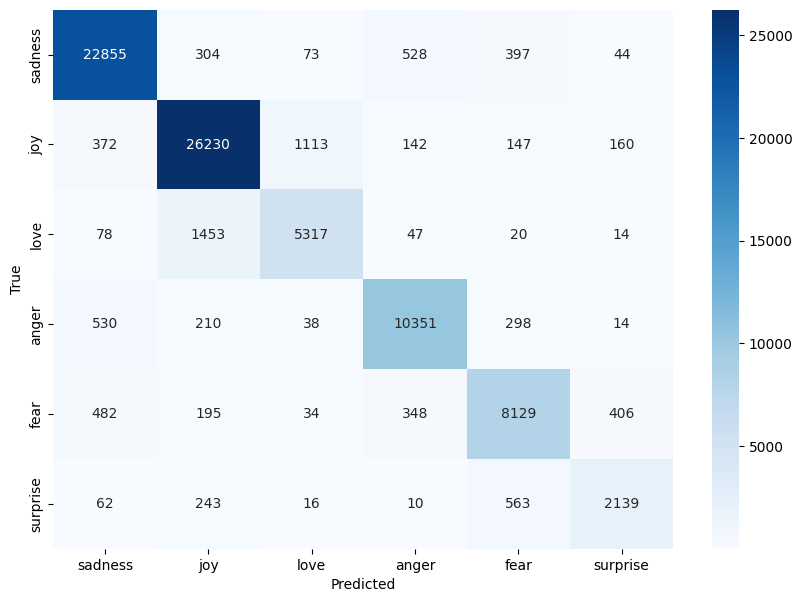

In [10]:
# Model Evaluation
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    cm = confusion_matrix(y_val, y_pred)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Model
evaluate_model(model, X_val, y_val)

## 6. Model Testing

Test the model on a separate test dataset and print the classification report.

In [8]:
# Model Testing
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Test Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.77      0.79      6929
           3       0.91      0.90      0.91     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



## 7. Model Deployment

Save the trained model to a file and provide functions to load the model for future use.

In [9]:
# Model Deployment
def save_model(model, file_path):
    joblib.dump(model, file_path)

def load_model(file_path):
    return joblib.load(file_path)

# Save Model
save_model(model, 'emotion_classifier.pkl')
print("Model Saved")

# Load Model
loaded_model = load_model('emotion_classifier.pkl')
print("Model Loaded")

# Test Loaded Model
test_model(loaded_model, X_test, y_test)

Model Saved
Model Loaded
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.77      0.79      6929
           3       0.91      0.90      0.91     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362

